In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns

from sklearn.decomposition import PCA

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

In [2]:
#그래프 출력 조건

# minus font 
# unicode minus를 사용하지 않기 위한 설정 (minus 깨짐현상 방지)
mpl.rcParams['axes.unicode_minus'] = False 

# jupyter notebook 내 그래프를 바로 그리기 위한 설정
%matplotlib inline

# customize matplitlib
plt.rcParams["figure.figsize"] = (25,10)
plt.rcParams['axes.titlesize'] = 15
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['font.size'] = 10

In [228]:
import pandas as pd
df = pd.read_csv("D:/경기대/2학년_2학기/dna 동아리/23_겨울방학프로젝트/전처리csv/worldcup_passing.csv", encoding='utf-8')
df.head(5)

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_total_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
0,Andrej Kramarić,FW,Croatia,31,1991,477,semi finals,153,176,2049,...,35,38,7,12,0,4,0,3,1,4
1,Ante Budimir,FW,Croatia,31,1991,54,semi finals,2,5,12,...,0,2,0,0,0,1,0,0,0,0
2,Borna Barišić,DF,Croatia,30,1992,117,semi finals,50,69,818,...,19,27,5,11,0,1,2,4,3,3
3,Borna Sosa,DF,Croatia,24,1998,423,semi finals,220,278,3068,...,61,83,10,23,0,2,11,3,2,9
4,Bruno Petković,FW,Croatia,28,1994,234,semi finals,40,75,590,...,10,17,4,8,0,4,7,0,0,5


In [4]:
df.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes', 'round',
       'passes_completed', 'passes', 'passes_total_distance',
       'passes_progressive_distance', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'assists', 'assisted_shots', 'passes_into_final_third',
       'passes_into_penalty_area', 'crosses_into_penalty_area',
       'progressive_passes'],
      dtype='object')

#### 범주형 변수: player, position, team, age, birth_year, minutes, round
#### 연속형 변수'passes_completed', 'passes', 'passes_total_distance' 'passes_progressive_distance', 'passes_completed_short', 'passes_short','passes_completed_medium', 'passes_medium', 'passes_completed_long','passes_long', 'assists', 'assisted_shots', 'passes_into_final_third','passes_into_penalty_area', 'crosses_into_penalty_area', 'progressive_passes'

#### 연속형 변수 중에서 passes 외 변수 사용 X
#### 이유: pass 관련 지표만 알아볼 예정이므로 crosses 등 변수 제외, assists 변수 역시 값 범위가 작음

### 1. 전처리 및 EDA
#### 각자  맡은 포지션 구분
#### 패스 관련 변수만 불러오기
#### 사전 pca 결과, 출전 시간이 적은 선수들이 사분면에서 0 사이에 위치함 -> 출전시간 분포를 보고 특정 시간보다 적게 뛴 선수 제외
#### 상관관계 높은 변수 살펴보고 전처리하기

In [229]:
# 포지션 구분 
df = df[df['position'] == 'GK']
df.head()

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_total_distance,...,passes_completed_medium,passes_medium,passes_completed_long,passes_long,assists,assisted_shots,passes_into_final_third,passes_into_penalty_area,crosses_into_penalty_area,progressive_passes
6,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,194,228,4572,...,81,81,43,76,0,0,3,0,0,0
33,Munir,GK,Morocco,33,1989,90,semi finals,19,28,597,...,10,10,7,16,0,0,0,0,0,0
42,Yassine Bounou,GK,Morocco,31,1991,567,semi finals,154,209,4346,...,82,84,43,94,0,0,0,0,0,0
60,Mathew Ryan,GK,Australia,30,1992,360,round of 16,113,164,3668,...,46,46,54,105,0,0,1,0,0,0
79,Shūichi Gonda,GK,Japan,33,1989,387,round of 16,68,113,1770,...,32,33,16,59,0,0,1,0,0,0


In [230]:
#  패스 관련 변수만 가져오기
df = df.drop(columns=['assists','passes_total_distance','passes_progressive_distance', 'assisted_shots', 'crosses_into_penalty_area'], axis=1)

In [8]:
df.columns

Index(['player', 'position', 'team', 'age', 'birth_year', 'minutes', 'round',
       'passes_completed', 'passes', 'passes_completed_short', 'passes_short',
       'passes_completed_medium', 'passes_medium', 'passes_completed_long',
       'passes_long', 'passes_into_final_third', 'passes_into_penalty_area',
       'progressive_passes'],
      dtype='object')

### 2. GK 포지션 EDA

In [ ]:
col_list = ['minutes', 'passes_completed', 'passes', 'passes_completed_short', 'passes_short', 'passes_completed_medium', 
           'passes_medium', 'passes_completed_long', 'passes_long', 'passes_into_final_third','passes_into_penalty_area'
           , 'progressive_passes']

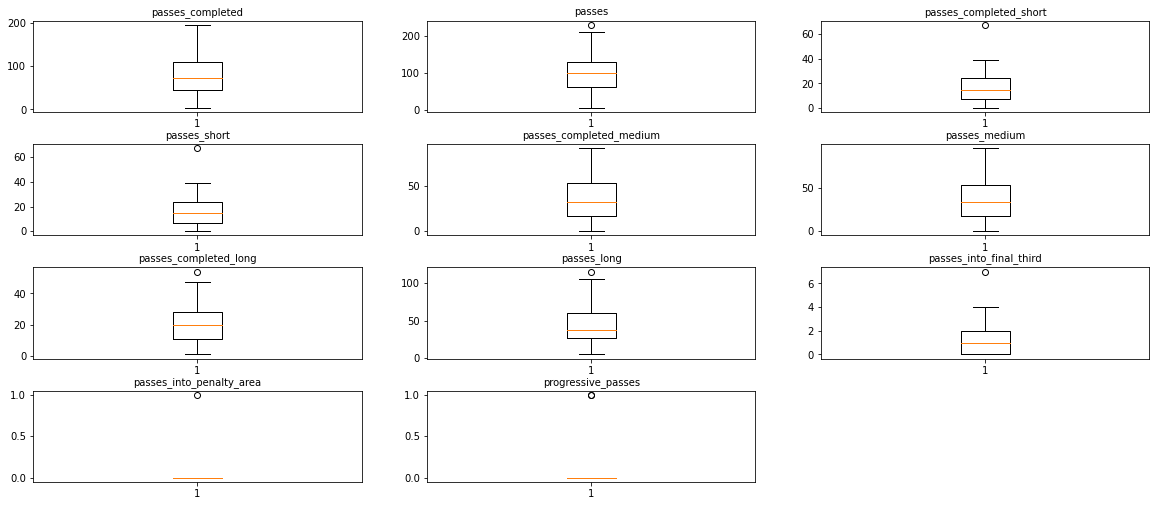

In [58]:
plt.figure(figsize=(20, 8)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(4, 3, i+1)
  plt.boxplot(df[col])
  plt.title(col, fontsize=10)

In [59]:
df.describe()

,age,birth_year,minutes,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,progressive_passes
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,30.512195,1991.463415,287.560976,75.682927,102.292683,16.829268,16.829268,37.317073,37.829268,21.146341,46.682927,1.073171,0.024390,0.048780
std,3.905905,3.937623,163.628703,45.036895,55.957235,13.245570,13.245570,23.919071,24.252734,13.331468,28.400210,1.421095,0.156174,0.218085
min,23.000000,1985.000000,9.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,1.000000,5.000000,0.000000,0.000000,0.000000
25%,28.000000,1988.000000,171.000000,45.000000,63.000000,7.000000,7.000000,17.000000,18.000000,11.000000,27.000000,0.000000,0.000000,0.000000
50%,30.000000,1992.000000,270.000000,72.000000,100.000000,15.000000,15.000000,32.000000,33.000000,20.000000,38.000000,1.000000,0.000000,0.000000
75%,34.000000,1994.000000,360.000000,108.000000,128.000000,24.000000,24.000000,53.000000,53.000000,28.000000,60.000000,2.000000,0.000000,0.000000
max,37.000000,1999.000000,693.000000,194.000000,228.000000,67.000000,67.000000,92.000000,95.000000,54.000000,115.000000,7.000000,1.000000,1.000000


#### 출전시간이 1사분위수 이하인 선수들 제외

In [192]:
df = df[df['minutes'] >= 171]

In [60]:
df.describe(include='object')

,player,position,team,round
count,41,41,41,41
unique,41,1,32,5
top,Meshaal Barsham,GK,Brazil,group stage
freq,1,41,3,20


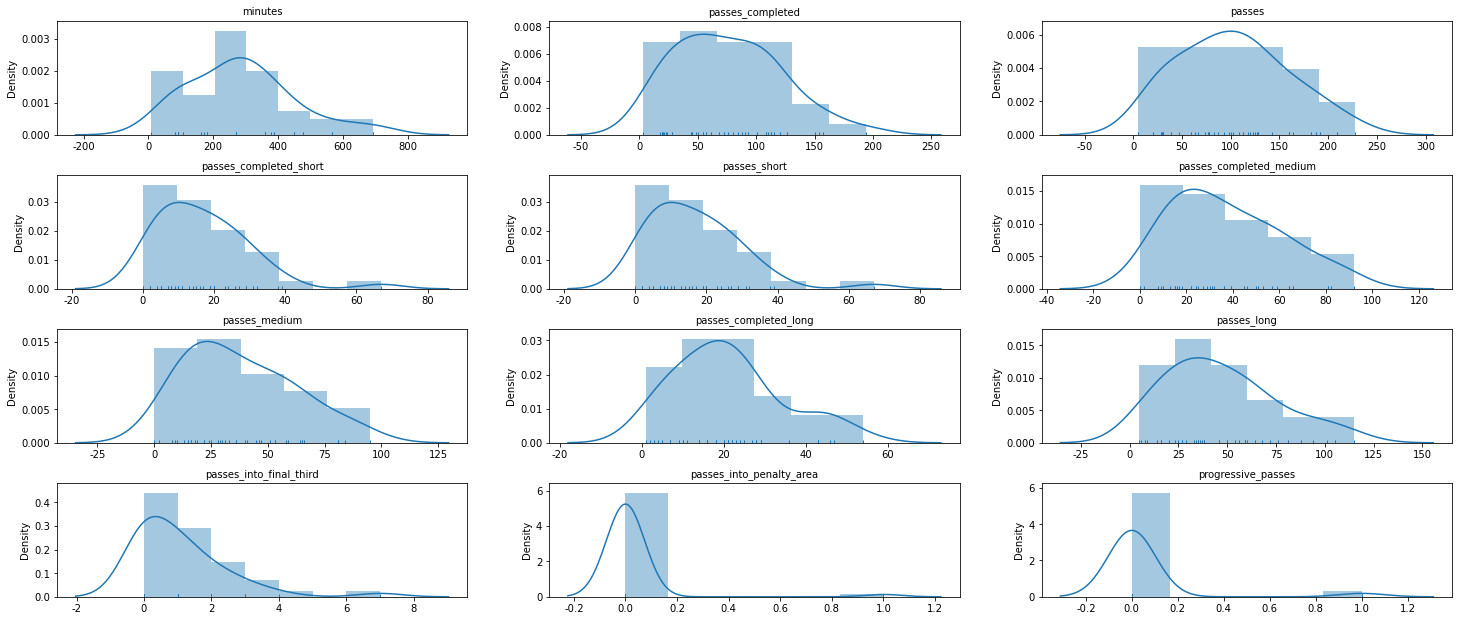

In [29]:
import warnings
warnings.filterwarnings( 'ignore' )

plt.figure(figsize=(25, 10)) # 가로, 세로 
plt.subplots_adjust(left=0.125, bottom=0.1,  right=0.9, top=0.9, wspace=0.2, hspace=0.35) #서브플롯 간 간격 조정

for i in range(len(col_list)):
  col = col_list[i]

  plt.subplot(4, 3, i+1)
  sns.distplot(x=df[col], kde=True, rug=True)
  plt.title(col, fontsize=10)

<AxesSubplot:title={'center':'pass_type'}>

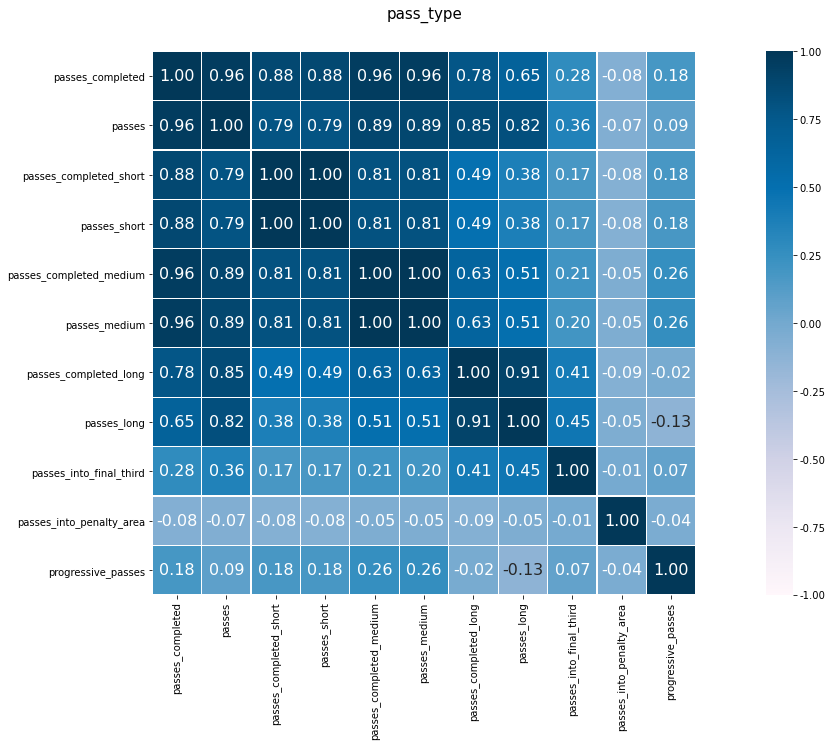

In [75]:
df_pass = df.filter(like='passes')

# 산점도 행렬 확인
plt.figure(figsize=(25, 10))

colormap = plt.cm.PuBu
plt.title("pass_type", y = 1.05, size = 15)
sns.heatmap(df_pass.corr(), 
            linewidths = 0.1, #셀 사이 선을 집어넣음 
            vmax = 1.0, #최댓값 
            vmin = -1.0, #최솟값 
            square = True, 
            cmap = colormap,#맵 색깔
            linecolor = "white", #셀 사이 라인 색깔 
            annot = True, #각 셀의 표기 유무 및 그 값의 데이터타입 설정 
            fmt = '.2f', #각 셀의 값의 데이터 형태 (만약 소수2째자리까지 한다면 '.2f')
            annot_kws = {"size" : 16}) #셀 안의 폰트 크기 

#### 출전시간은 대체적으로 정규분포에 근사
#### 긴 패스, 중간 패스, 짧은 패스의 경우, 성공률과 시도 횟수 변수 두 개씩 있는데, 두 변수 간 분포가 유사 
#### 상관관계 역시 높게 나옴 -> 따라서 각 패스 성공률 계산해 패스 시도, 패스 성공률 변수만 pca에 사용하고, 성공 변수는 사용 X
#### passes_into_penalty_area, progressive_passes 변수 역시 거의 모든 값과 낮은 상관 -> 해당 변수가 존재하는 gk가 별로 없어서 그럼 -> 변수 제거 

### 패스 성공률 변수 생성 및 패스 성공 변수 삭제 후 corr 재확인

#### -의미있는 성공률: 패스 성공률, 롱패스 성공률
#### -의미없는 성공률: 짧은 패스 성공률, 중간 패스 성공률은 거의 모든 선수가 100프로라 의미가 없어보임

In [112]:
df.head(3)

,player,position,team,age,birth_year,minutes,round,passes_completed,passes,passes_completed_short,passes_short,passes_completed_medium,passes_medium,passes_completed_long,passes_long,passes_into_final_third,passes_into_penalty_area,progressive_passes
0,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,194,228,67,67,81,81,43,76,3,0,0
1,Munir,GK,Morocco,33,1989,90,semi finals,19,28,2,2,10,10,7,16,0,0,0
2,Yassine Bounou,GK,Morocco,31,1991,567,semi finals,154,209,29,29,82,84,43,94,0,0,0


In [125]:
#short_passes_pct = df.iloc[:,9] / df.iloc[:,10]
#short_passes_pct = pd.DataFrame(passes_pct, columns=['short_passes_pct']

#medium_passes_pct = df.iloc[:,11] / df.iloc[:,12]
#medium_passes_pct = pd.DataFrame(passes_pct, columns=['medium_passes_pct']

In [231]:
# 성공률 변수 추가
passes_pct = df.iloc[:,7] / df.iloc[:,8]
passes_pct = pd.DataFrame(passes_pct, columns=['passes_pct'])

df['passes_pct'] = passes_pct

long_passes_pct = df.iloc[:,13] / df.iloc[:,14]
long_passes_pct = pd.DataFrame(long_passes_pct, columns=['long_passes_pct'])

df['long_passes_pct'] = long_passes_pct

In [232]:
long_passes_pct = df.iloc[:,13] / df.iloc[:,14]
long_passes_pct = pd.DataFrame(long_passes_pct, columns=['long_passes_pct'])

df['long_passes_pct'] = long_passes_pct

In [233]:
# passes_into_penalty_area 및 성공 변수 제거
df = df.drop(columns=['passes_into_penalty_area', 'progressive_passes'],axis=1)
df = df[df.columns.drop(list(df.filter(regex='completed')))]

In [234]:
df.head()

,player,position,team,age,birth_year,minutes,round,passes,passes_short,passes_medium,passes_long,passes_into_final_third,passes_pct,long_passes_pct
6,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,228,67,81,76,3,0.850877,0.565789
33,Munir,GK,Morocco,33,1989,90,semi finals,28,2,10,16,0,0.678571,0.437500
42,Yassine Bounou,GK,Morocco,31,1991,567,semi finals,209,29,84,94,0,0.736842,0.457447
60,Mathew Ryan,GK,Australia,30,1992,360,round of 16,164,13,46,105,1,0.689024,0.514286
79,Shūichi Gonda,GK,Japan,33,1989,387,round of 16,113,20,33,59,1,0.601770,0.271186


### 주성분 분석 시작

In [235]:
# 탐색할 변수 필터링
df1 = df.filter(like='passes')

In [236]:
# 인덱스 재정렬
df = df.reset_index(drop=True)

In [237]:
df1.columns

Index(['passes', 'passes_short', 'passes_medium', 'passes_long',
       'passes_into_final_third', 'passes_pct', 'long_passes_pct'],
      dtype='object')

In [238]:
# 1. 열별로 scaling 

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scale = pd.DataFrame(scaler.fit_transform(df1), columns=df1.columns, index = df1.index)

<AxesSubplot:title={'center':'pass_type'}>

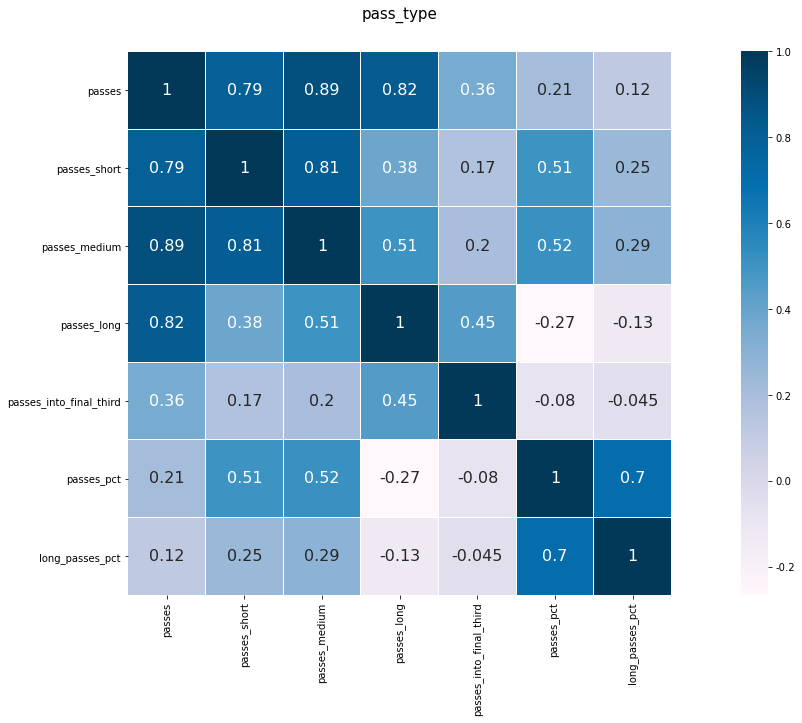

In [239]:
# 산점도 행렬 확인
plt.figure(figsize=(25, 10))

colormap = plt.cm.PuBu
plt.title("pass_type", y = 1.05, size = 15)
sns.heatmap(df1.astype(float).corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 16})

In [240]:
# 2. 주성분 분석 fit 

# 고윳값을 기준으로 설명할 수 있는 분산량
pca = PCA(n_components=2) #주성분은 2개로 해야 2차원 산점도로 표현 쉬움
printcipalComponents = pca.fit_transform(df1)

principalDf = pd.DataFrame(data=printcipalComponents, columns = ['pca1', 'pca2'])
# 주성분으로 이루어진 데이터 프레임 구성

In [241]:
principalDf.head(3)

,pca1,pca2
0,140.492401,24.883277
1,-86.334398,-0.800101
2,125.765561,-0.934920


In [242]:
#고윳값 (설명력)
print('주성분의 설명력:', pca.explained_variance_ratio_)
print('전체 분산에 대한 설명력:',sum(pca.explained_variance_ratio_))

주성분의 설명력: [0.90547674 0.08309047]
전체 분산에 대한 설명력: 0.9885672114317597


In [243]:
#고유벡터 (eigenvector)
print('pca1의 고유벡터:', np.round(pca.components_[0],3), sep = '\n')
print('                                    ')
print('pca2의 고유벡터', np.round(pca.components_[1],3) , sep= '\n')

pca1의 고유벡터:
[0.857 0.157 0.328 0.365 0.008 0.    0.   ]
                                    
pca2의 고유벡터
[ 0.071  0.317  0.532 -0.782 -0.019  0.005  0.003]


In [244]:
a = np.round(pca.components_[0],3)
a = a.tolist()
b = np.round(pca.components_[1],3)
b = b.tolist()

In [245]:
pca_data = {'pca1' : a, 'pca2' : b}
df_pca = pd.DataFrame(pca_data, index= df1.columns)
df_pca

,pca1,pca2
passes,0.857,0.071
passes_short,0.157,0.317
passes_medium,0.328,0.532
passes_long,0.365,-0.782
passes_into_final_third,0.008,-0.019
passes_pct,0.000,0.005
long_passes_pct,0.000,0.003


In [246]:
#범주형 변수를 가진 df와 병합
    
df_info = df.iloc[:,0:7]
result = pd.concat([df_info, principalDf], axis=1)
result

,player,position,team,age,birth_year,minutes,round,pca1,pca2
0,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,140.492401,24.883277
1,Munir,GK,Morocco,33,1989,90,semi finals,-86.334398,-0.800101
2,Yassine Bounou,GK,Morocco,31,1991,567,semi finals,125.765561,-0.934920
3,Mathew Ryan,GK,Australia,30,1992,360,round of 16,76.244515,-38.049855
4,Shūichi Gonda,GK,Japan,33,1989,387,round of 16,12.585379,-10.428248
5,Kim Seung-gyu,GK,Korea Republic,32,1990,360,round of 16,29.847858,-2.022455
6,Wojciech Szczęsny,GK,Poland,32,1990,360,round of 16,50.586582,-45.538375
7,Edouard Mendy,GK,Senegal,30,1992,360,round of 16,20.197207,-7.063916
8,Unai Simón,GK,Spain,25,1997,387,round of 16,64.342157,56.649032
9,Gregor Kobel,GK,Switzerland,25,1997,90,round of 16,-85.920754,8.353047


In [3]:
result.sort_values(by='minutes',ascending=False)

NameError: name 'result' is not defined

### PCA 해석 및 시각화

In [247]:
df_pca

,pca1,pca2
passes,0.857,0.071
passes_short,0.157,0.317
passes_medium,0.328,0.532
passes_long,0.365,-0.782
passes_into_final_third,0.008,-0.019
passes_pct,0.000,0.005
long_passes_pct,0.000,0.003


#### pca1: 패스, 중간 패스, 롱 패스에 대한 정보를 주로 담고 있는 주성분 -> pca1가 클수록 패스 시도, 롱 패스 시도 자체가 많은 선수
#### pca2: 롱 패스, 파이널 서드 패스 변수가 음수, 중간 패스, 짧은 패스는 높은 양수값을 지님 -> pca2가 클수록 롱패스, 파이널서드 패스를 적게 하고, 짧은 패스, 중간 패스를 많이함 

### 시사점 및 문제점
#### 1. 성공 변수와 시도 변수 간의 상관을 낮추기 위해서 성공률 변수를 사용했는데 pct 변수가 주성분 안에 큰 영향 x 
#### 2. 전체 설명력이 0.98 정도로 매우 과적합된 가능성 존재 
#### 3. (매우 중요) 출전시간이 많을수록 거의 모든값의 시도 횟수 자체가 높다 -> 단순 시도 변수가 아닌 90분당 시도 횟수로 바꿔야 할 여지 존재

In [262]:
result.sort_values(by=['pca1'],ascending=False).head(5)

,player,position,team,age,birth_year,minutes,round,pca1,pca2
0,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,140.492401,24.883277
2,Yassine Bounou,GK,Morocco,31,1991,567,semi finals,125.765561,-0.934920
16,Andries Noppert,GK,Netherlands,28,1994,477,quarter finals,105.468004,6.419033
38,Emiliano Martínez,GK,Argentina,30,1992,693,finals,98.641490,-7.522991
39,Hugo Lloris,GK,France,35,1986,567,finals,96.599260,-42.168693


#### pca1 상위 5명 추출 -> 이 다섯명의 선수가 패스 시도, 롱 패스 시도 자체가 많은 선수

In [263]:
result.sort_values(by=['pca2'],ascending=False).head(5)

,player,position,team,age,birth_year,minutes,round,pca1,pca2
8,Unai Simón,GK,Spain,25,1997,387,round of 16,64.342157,56.649032
10,Yann Sommer,GK,Switzerland,34,1988,270,round of 16,16.049541,35.769922
12,Alisson,GK,Brazil,30,1992,378,quarter finals,-14.435313,26.375381
18,Thibaut Courtois,GK,Belgium,30,1992,270,group stage,23.957526,25.020935
0,Dominik Livaković,GK,Croatia,27,1995,693,semi finals,140.492401,24.883277


#### pca2 상위 5명 추출 -> 해당 선수들은 짧은 패스, 중간 패스가 많은 선수

In [ ]:
result.sort_values(by=['pca1'],ascending=False).head(5)

<Figure size 1080x720 with 0 Axes>

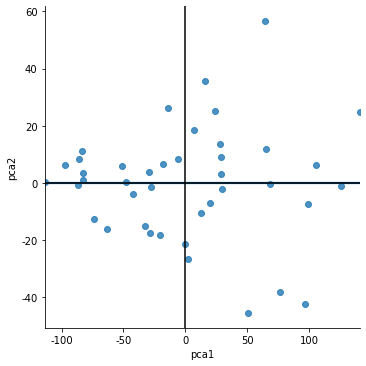

In [282]:
plt.figure(figsize=(15, 10))

sns.lmplot(x="pca1", y="pca2", height=5,data=result, ci=None) #height는 이미지 사이즈
plt.axvline(x=0, color = 'black') 
plt.axhline(y=0, color = 'black')
plt.show()

<Figure size 864x432 with 0 Axes>

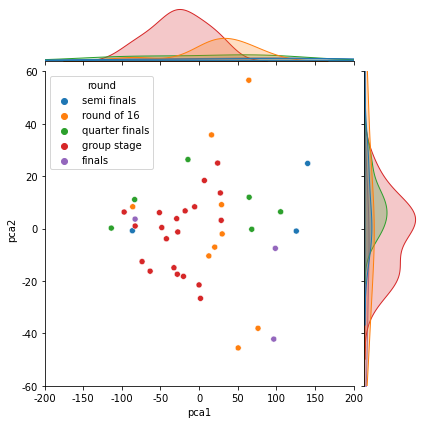

In [264]:
plt.figure(figsize=(12, 6))

sns.jointplot(x='pca1', y='pca2', hue='round', data=result, xlim = (-200,200), ylim = (-60,60))
plt.show()

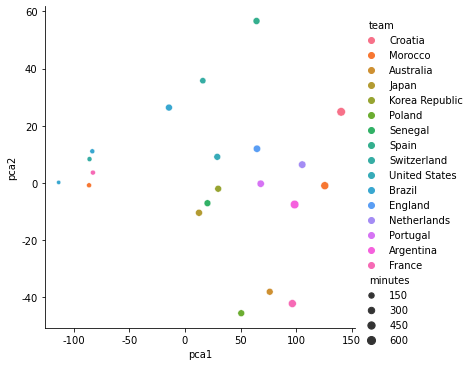

In [298]:
df_16 = result[result['round'] != 'group stage']

sns.relplot(x="pca1", y="pca2", height=5,
            size = 'minutes',
            hue='team', data=df_16, ci=None)

#### 해당 시각화를 보면 확실히 많이 뛸수록 pca1값이 크다는 것을 알 수 있음
#### 즉, 모든 변수를 시간 대비로 나눠야 한다는 의미 